# DQN with modifications

We use the standard DQN algorithm proposed by https://www.nature.com/articles/nature14236 and we understand the significance of each of the factors by varying them and analysing the performance of the algorithm.


In [1]:
import gym
import random
import torch
import numpy as np 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Environment - 'CartPole - v0'

Explain about state space, action space, reward (discount?)

In [2]:
env = gym.make('Acrobot-v1')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (6,)
Number of actions:  3


# Case 1- (+Q + E + T)

### Neural Network 
Input Layer - 4 nodes (State Shape) \
Hidden Layer 1 - 64 nodes \
Hidden Layer 2 - 64 nodes \
Output Layer - 2 nodes (Action Space) \
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (YES)
Gradient is clipped to 1 & -1

Episode 100	Average Score: -378.94
Episode 200	Average Score: -184.69
Episode 300	Average Score: -115.21
Episode 400	Average Score: -106.69
Episode 500	Average Score: -128.08
Episode 600	Average Score: -123.07
Episode 700	Average Score: -102.05
Episode 800	Average Score: -100.96
Episode 900	Average Score: -104.31
Episode 1000	Average Score: -102.76
Episode 100	Average Score: -372.54
Episode 200	Average Score: -170.11
Episode 300	Average Score: -123.18
Episode 400	Average Score: -105.59
Episode 500	Average Score: -102.13
Episode 600	Average Score: -97.744
Episode 700	Average Score: -100.90
Episode 800	Average Score: -103.68
Episode 900	Average Score: -105.38
Episode 1000	Average Score: -92.73


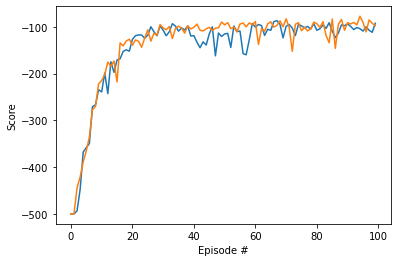

In [5]:
from config1 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings = 2
sibling_scores = []
sibling_lives = np.zeros(no_siblings)


def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                 # list containing scores from each episode
    scores_window_printing = deque(maxlen=10) # For printing in the graph
    scores_window= deque(maxlen=100)  # last 100 scores for checking if the avg is more than 195
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores_window_printing.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")  
        if i_episode % 10 == 0: 
            scores.append(np.mean(scores_window_printing))        
        if i_episode % 100 == 0: 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=495.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return [np.array(scores),i_episode-100]

fig = plt.figure()
ax = fig.add_subplot(111)


for i in range(no_siblings):
    
    agent = Agent(state_size=6,action_size = 3,seed = 0)
    [temp_scores,sibling_lives[i]] = dqn()
    sibling_scores.append(temp_scores)
    plt.plot(np.arange(len(temp_scores)), temp_scores)
    
        
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
print(temp_scores)
print('-----')
print(temp_life)

sibling_scores.append(temp_scores)
sibling_lives[i] = temp_life

[-500.  -494.2 -479.5 ...  -75.   -91.   -77.9]
-----


NameError: name 'temp_life' is not defined

# Case 2- (+Q + E - T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (NO)
No Gradient clipping present

In [ ]:
from config2 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings = 2
sibling_scores = []
sibling_lives = np.zeros(no_siblings)


def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores2 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores2)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores2
        temp_avg_iter[:existing_length] += avg_iter
        
        scores2 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores2[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores2 = np.divide(scores2,avg_iter)
    
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores2)), scores2)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 3- (+Q -E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (NO)
No Experience Replay / Experience Replay of Size 1

### Loss Clipping (YES)
Gradient is clipped to 1 & -1

In [ ]:
from config3 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores3 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores3)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores3
        temp_avg_iter[:existing_length] += avg_iter
        
        scores1 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores3[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores3 = np.divide(scores3,avg_iter)
    
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores3)), scores3)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 4- (+Q -E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (NO)
No Experience Replay / Experience Replay of Size 1

### Loss Clipping (NO)
No Gradient clipping present

In [ ]:
from config4 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores4 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores4)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores4
        temp_avg_iter[:existing_length] += avg_iter
        
        scores1 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores4[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores4 = np.divide(scores4,avg_iter)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores4)), scores4)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 5- (-Q +E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Networks Update Frequency (NO)
Frequency of network switch - Every episode

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (YES)
Gradient is clipped to 1 & -1

In [ ]:
from config5 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores5 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores5)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores5
        temp_avg_iter[:existing_length] += avg_iter
        
        scores5 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores5[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores5 = np.divide(scores5,avg_iter)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores5)), scores5)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 6: (-Q +E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (NO)
Frequency of network switch - Every episode

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (NO)
No Gradient clipping present

In [ ]:
from config6 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)
n_players = 10
results = np.zeros([])

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores6 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores6)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores6
        temp_avg_iter[:existing_length] += avg_iter
        
        scores6 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores6[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores6 = np.divide(scores6,avg_iter)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores6)), scores6)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 7: (-Q -E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency 
Frequency of network switch - Every episode

###  Experience Replay
No Experience Replay / Experience Replay of Size 1

### Loss Clipping
Gradient is clipped to 1 & -1

In [ ]:
from config7 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores7 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores7)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores7
        temp_avg_iter[:existing_length] += avg_iter
        
        scores7 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores7[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores7 = np.divide(scores7,avg_iter)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores7)), scores7)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Case 8: (-Q -E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency 
Frequency of network switch - Every episode

###  Experience Replay
No Experience Replay / Experience Replay of Size 1

### Loss Clipping
No Gradient clipping present

In [ ]:
from config8 import Agent

agent = Agent(state_size=4,action_size = 2,seed = 0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        #scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            scores.append(np.mean(scores_window))
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores8 = np.array([0])
avg_iter = np.array([0])

for i in range(11):
    
    agent = Agent(state_size=4,action_size = 2,seed = 0)
    temp_scores = dqn()
    temp_avg_iter = np.ones_like(temp_scores)
    
    existing_length = len(scores8)
    new_length = len(temp_scores)
    
    if existing_length <= new_length:    
        
        temp_scores[:existing_length] += scores8
        temp_avg_iter[:existing_length] += avg_iter
        
        scores8 = temp_scores
        avg_iter = temp_avg_iter
        
    else:
        
        scores8[:new_length] += temp_scores
        avg_iter[:new_length] += temp_avg_iter
    
scores8 = np.divide(scores8,avg_iter)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores8)), scores8)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Plots


In [ ]:
# Using Numpy to create an array X
X = np.arange(0, 2000, 100)

plt.plot(np.arange(len(scores1)), scores1, color='b', label='case 1')
plt.plot(np.arange(len(scores2)), scores2, color='g', label='case 2')
plt.plot(np.arange(len(scores3)), scores3, color='r', label='case 3')
plt.plot(np.arange(len(scores4)), scores4, color='c', label='case 4')
plt.plot(np.arange(len(scores5)), scores5, color='m', label='case 5')
plt.plot(np.arange(len(scores6)), scores6, color='y', label='case 6')
plt.plot(np.arange(len(scores7)), scores7, color='k', label='case 7')
plt.plot(np.arange(len(scores8)), scores8, color='w', label='case 8')

plt.xlabel("Episodes x100#")
plt.ylabel("Avg Score")
plt.title("Variations in DQN")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# Using Numpy to create an array X
X = np.arange(0, 2000, 100)

plt.plot(np.arange(len(scores1)), scores1, color='b', label='Target Network on')

plt.plot(np.arange(len(scores5)), scores5, color='m', label='Target Network off')


plt.xlabel("Episodes x100#")
plt.ylabel("Avg Score")
plt.title("Variations in DQN")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# Using Numpy to create an array X
X = np.arange(0, 2000, 100)

plt.plot(np.arange(len(scores1)), scores1, color='b', label='EXP Replay on')

plt.plot(np.arange(len(scores3)), scores3, color='m', label='EXP Replay off')


plt.xlabel("Episodes x100#")
plt.ylabel("Avg Score")
plt.title("Variations in DQN")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
# Using Numpy to create an array X
X = np.arange(0, 2000, 100)

plt.plot(np.arange(len(scores1)), scores1, color='b', label='Truncation on')

plt.plot(np.arange(len(scores2)), scores2, color='m', label='Truncation off')


plt.xlabel("Episodes x100#")
plt.ylabel("Avg Score")
plt.title("Variations in DQN")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()